In [13]:
#run the following if wordcloud is not installed
!pip install wordcloud

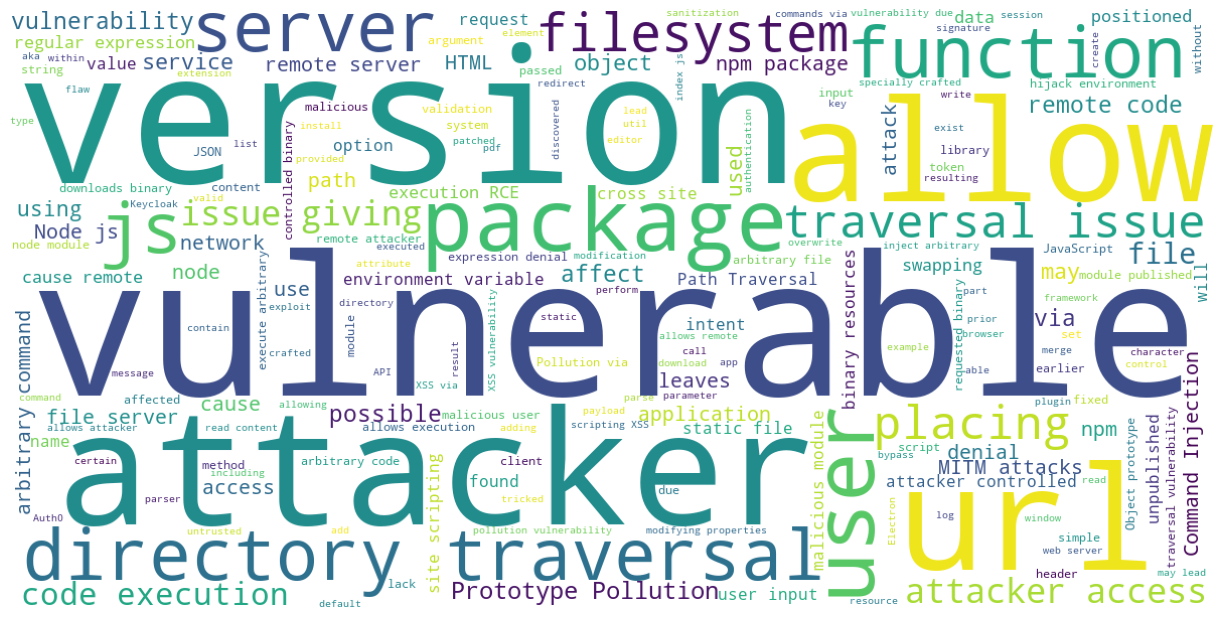

In [14]:
# Wordcloud on the relative appearance of terms in vulnerabilities description text

from wordcloud import WordCloud      # visualising word clouds
import pandas as pd                  # standard pandas import
import matplotlib.pyplot as plt      # generate plot

#data = pd.read_csv('../data/all.csv',encoding='latin1', low_memory=False)
data = pd.read_csv('../data/javascript/all.csv',encoding='latin1', low_memory=False)

wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(str(data.description.values))

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
!pip install texttable

In [16]:
from texttable import Texttable

print('Dataset Overview:\n')

data['published_date'] = pd.to_datetime(data['date_published']).dt.date
print(f"Earliest date: {data.published_date.min()}")
print(f"Latest date: {data.published_date.max()}")
print(f"Over {(data.published_date.max() - data.published_date.min()).days} days")

data.drop(columns='published_date')

t = Texttable()

total=data.id.describe()[0]

table=[['Name','size (%)']]
for c in data.columns:
    table.append([c, str(data[c].describe()[0])+' ('+str(round(data[c].describe()[0]/total*100,2))+')'])
t.add_rows(table)
print(t.draw())

Dataset Overview:

Earliest date: 2016-02-23
Latest date: 2020-12-30
Over 1772 days
+------------------------+---------------+
|          Name          |   size (%)    |
+========================+===============+
| Unnamed: 0             | 912.0 (100.0) |
+------------------------+---------------+
| id                     | 912.0 (100.0) |
+------------------------+---------------+
| source_db              | 521 (57.13)   |
+------------------------+---------------+
| source_db_id           | 912 (100.0)   |
+------------------------+---------------+
| library                | 584 (64.04)   |
+------------------------+---------------+
| cna                    | 912 (100.0)   |
+------------------------+---------------+
| cvss3_bscore           | 912.0 (100.0) |
+------------------------+---------------+
| cvss3_severity         | 912 (100.0)   |
+------------------------+---------------+
| cvss3_impact           | 912.0 (100.0) |
+------------------------+---------------+
| cvss3_explo